<a href="https://colab.research.google.com/github/kimqkr4/submission/blob/main/homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # for feature scaling

In [20]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv')
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

w = np.zeros([3, 1])

X_train_biased = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_biased = np.c_[np.ones(X_test.shape[0]), X_test]

alpha = 0.01

for i in range(10000):
    z = np.dot(X_train_biased, w)
    h = sigmoid(z)

    gradient = -np.dot(X_train_biased.T, (y_train.reshape(-1, 1) - h))

    w = w - alpha * gradient

w0 = w[0, 0]
w1 = w[1, 0]
w2 = w[2, 0]
print("학습된 가중치:")
print("w0:", w0)
print("w1:", w1)
print("w2:", w2)

학습된 가중치:
w0: -1.0391393365114188
w1: 2.119332255640137
w2: 1.2208041779711891


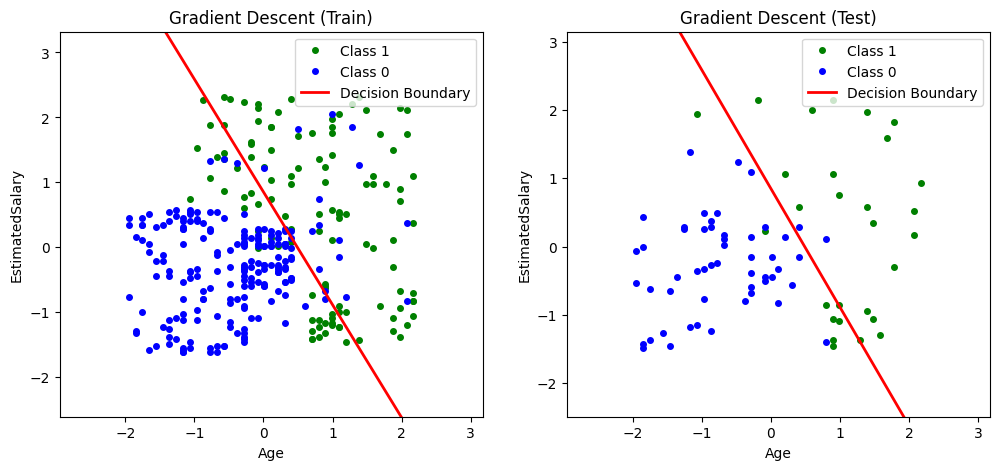

In [25]:
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xp = np.linspace(x_min, x_max, 100).reshape(-1,1)
    yp = - (model[1] / model[2]) * xp - (model[0] / model[2])

    plt.plot(X[y == 1, 0], X[y == 1, 1], 'go', markersize=4, label='Class 1')
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', markersize=4, label='Class 0')
    plt.plot(xp, yp, 'r', linewidth=2, label='Decision Boundary')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('EstimatedSalary')
    plt.legend(loc='best')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

gradient_descent_model = [w0, w1, w2]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, gradient_descent_model, 'Gradient Descent (Train)')

plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, gradient_descent_model, 'Gradient Descent (Test)')

plt.show()

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

w0 = model.intercept_[0]
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
print("학습된 가중치 (sklearn):")
print("w0:", w0)
print("w1:", w1)
print("w2:", w2)

학습된 가중치 (sklearn):
w0: -0.9950491589967495
w1: 1.965097837355362
w2: 1.1350902087855854


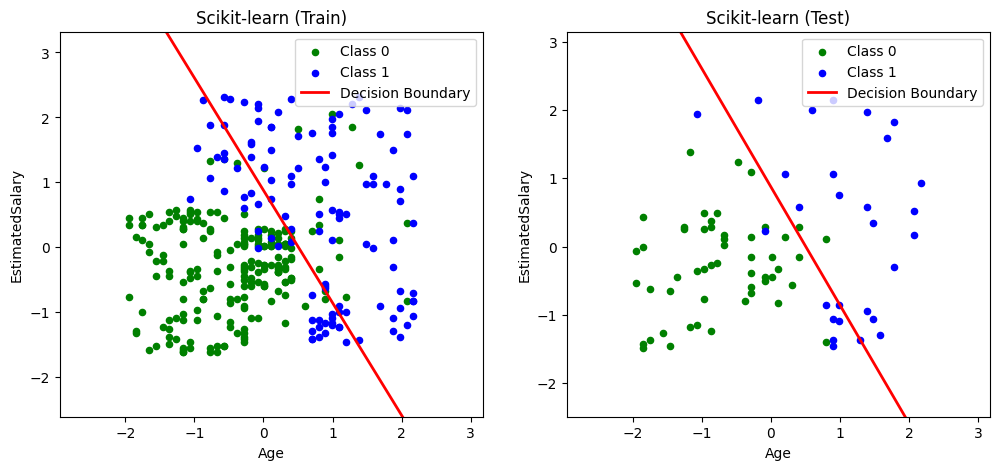

In [40]:
def plot_decision_boundary(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xp = np.linspace(x_min, x_max, 100)
    yp = -(model.intercept_[0] + model.coef_[0][0] * xp) / model.coef_[0][1]

    ax.set_facecolor('white')

    ax.scatter(X[y == 0, 0], X[y == 0, 1],color='green',  label='Class 0', s=20)
    ax.scatter(X[y == 1, 0], X[y == 1, 1],color='blue',  label='Class 1', s=20)

    ax.plot(xp, yp, 'r', linewidth=2, label='Decision Boundary')

    ax.set_xlabel('Age')
    ax.set_ylabel('EstimatedSalary')
    ax.set_title(title)
    ax.legend(loc='best')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, model, 'Scikit-learn (Train)', ax1)

ax2 = plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, model, 'Scikit-learn (Test)', ax2)

plt.show()